# Temperature Forecast Project using ML
## C Soma sekhar goud
## Batch.No: DS2307

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split




In [59]:
df = pd.read_csv("temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [153]:
df.shape

(7750, 25)

In [61]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [63]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


In [65]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In [66]:
#remove null values in station , date columns

df = df.dropna(axis=0,subset=['station','Date'])

In [67]:
#Now replace all the null values with there respective mean

df.fillna(df.mean(),inplace=True)
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

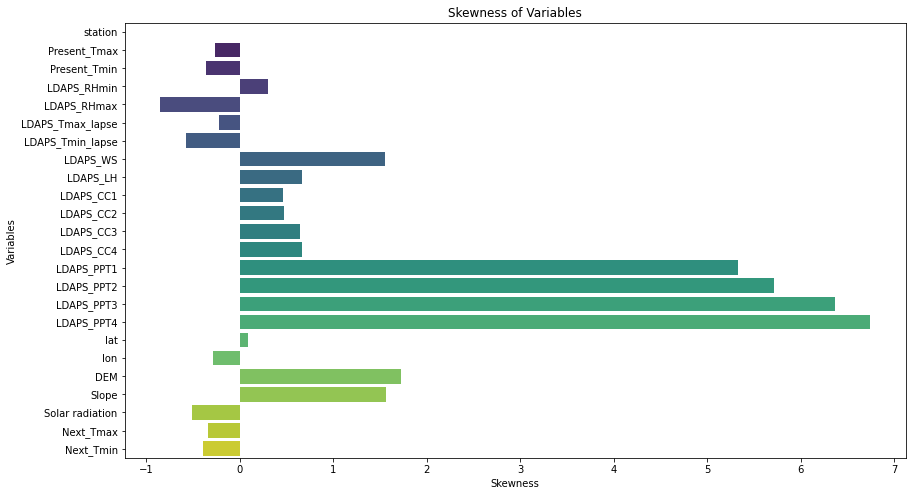

In [68]:
# Extract the skewness values and variable names
skewness_values = df.skew()
variable_names = skewness_values.index

# Create a grid of bar plots
plt.figure(figsize=(14, 8))
sns.barplot(x=skewness_values, y=variable_names, palette='viridis')
plt.title('Skewness of Variables')
plt.xlabel('Skewness')
plt.ylabel('Variables')
plt.show()


* Symmetric Variables (Skewness close to 0):

station: Skewness is 0, indicating a symmetric distribution. This is expected since it's an identifier.
    
* Slightly Negatively Skewed Variables:

Present_Tmax, Present_Tmin, Next_Tmax, Next_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Solar radiation: Skewness is close to 0, indicating a slightly negatively skewed distribution.
This suggests that the majority of the data is slightly concentrated towards higher values.

* Moderately Negatively Skewed Variables:

lon: Skewness is -0.29, indicating a moderately negatively skewed distribution.

* Moderately Positively Skewed Variables:

LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_RHmin: Skewness values are positive, suggesting a moderately positively skewed distribution.

* Highly Positively Skewed Variables:

LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4: Skewness values are significantly positive, indicating a highly positively skewed distribution. These variables might have a few very high values, leading to this skewness.

* Variables with Extreme Skewness:

LDAPS_WS, LDAPS_LH, DEM, Slope: Skewness values are relatively high, indicating a distribution with a long tail. These variables might have outliers/extreme values.

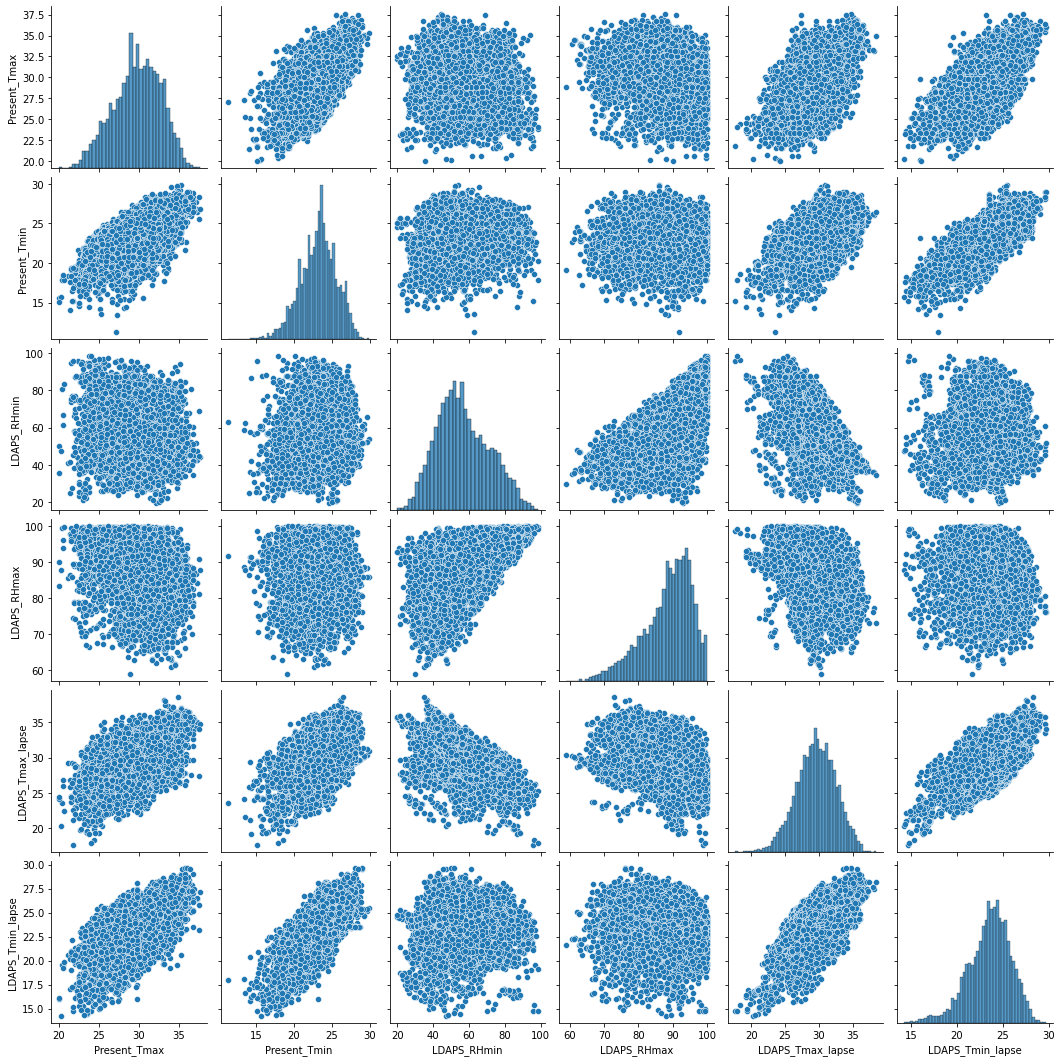

In [69]:
# Pairplot for numerical variables
sns.pairplot(df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse']])
plt.show()


In [70]:
df['Date'] = pd.to_datetime(df['Date'])
#df.dtypes

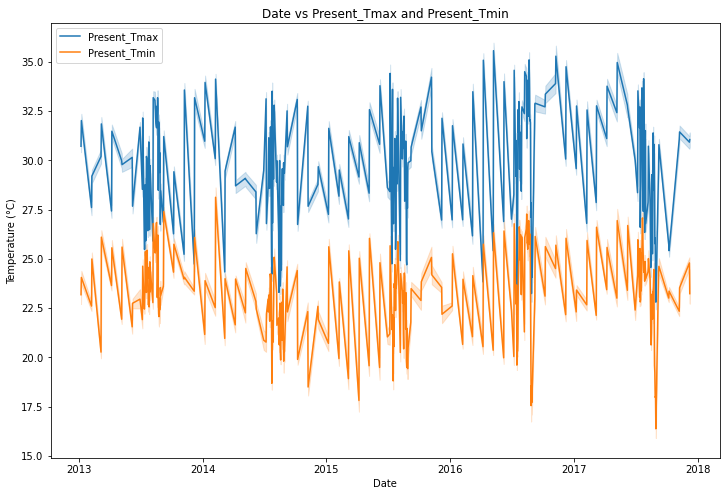

In [71]:
# Line plot using Seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='Present_Tmax', data=df, label='Present_Tmax')
sns.lineplot(x='Date', y='Present_Tmin', data=df, label='Present_Tmin')

# Customize the plot
plt.title('Date vs Present_Tmax and Present_Tmin')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

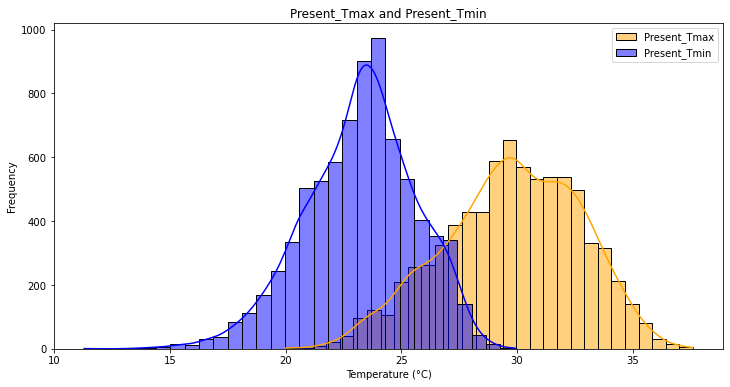

In [72]:
plt.figure(figsize=(12, 6))

sns.histplot(df['Present_Tmax'], bins=30, kde=True, color='orange', label='Present_Tmax')
sns.histplot(df['Present_Tmin'], bins=30, kde=True, color='blue', label='Present_Tmin')

# Customize the plot
plt.title('Present_Tmax and Present_Tmin')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

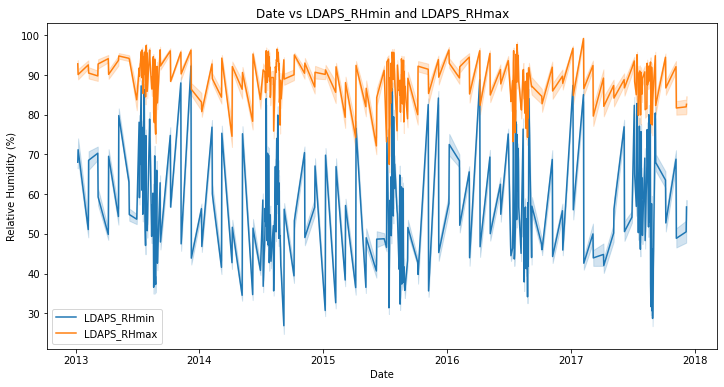

In [73]:
# Humidty
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='LDAPS_RHmin', data=df, label='LDAPS_RHmin')
sns.lineplot(x='Date', y='LDAPS_RHmax', data=df, label='LDAPS_RHmax')

# Customize the plot
plt.title('Date vs LDAPS_RHmin and LDAPS_RHmax')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()

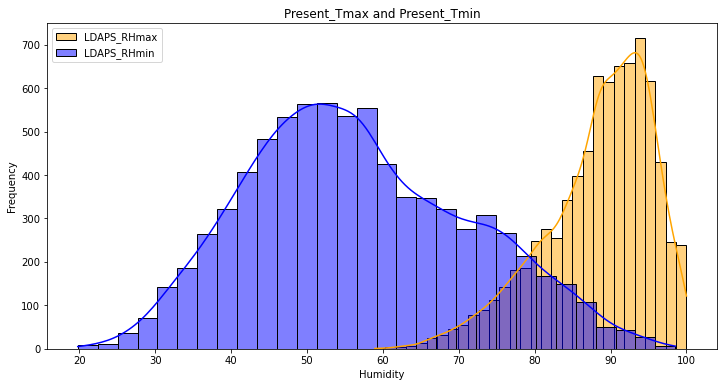

In [74]:
plt.figure(figsize=(12, 6))

sns.histplot(df['LDAPS_RHmax'], bins=30, kde=True, color='orange', label='LDAPS_RHmax')
sns.histplot(df['LDAPS_RHmin'], bins=30, kde=True, color='blue', label='LDAPS_RHmin')

# Customize the plot
plt.title('Present_Tmax and Present_Tmin')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.legend()
plt.show()



LDAPS_RHmax is left skewed 

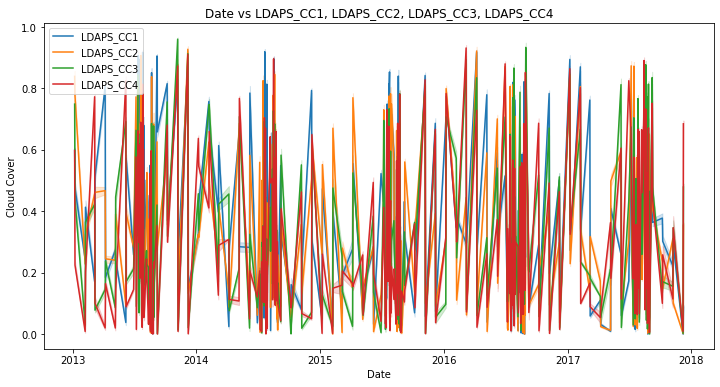

In [75]:
# average cloud cover
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='LDAPS_CC1', data=df, label='LDAPS_CC1')
sns.lineplot(x='Date', y='LDAPS_CC2', data=df, label='LDAPS_CC2')
sns.lineplot(x='Date', y='LDAPS_CC3', data=df, label='LDAPS_CC3')
sns.lineplot(x='Date', y='LDAPS_CC4', data=df, label='LDAPS_CC4')

# Customize the plot
plt.title('Date vs LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4')
plt.xlabel('Date')
plt.ylabel('Cloud Cover')
plt.legend()
plt.show()

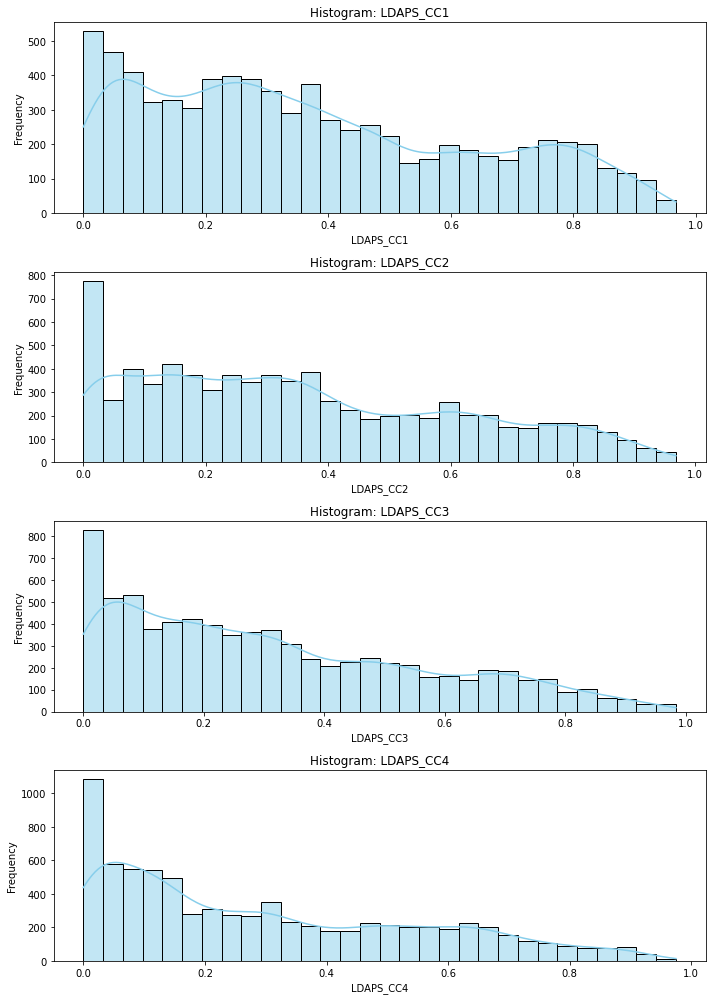

In [76]:
# Specify the variables you want to plot
variables_to_plot = ['LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4']

# Create a grid of subplots
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=1, figsize=(10, 14))

# Plot each variable in a separate subplot
for i, variable in enumerate(variables_to_plot):
    sns.histplot(df[variable], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram: {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

All the 6 hour split is right skewed and majority of all the splits values are close to 0.

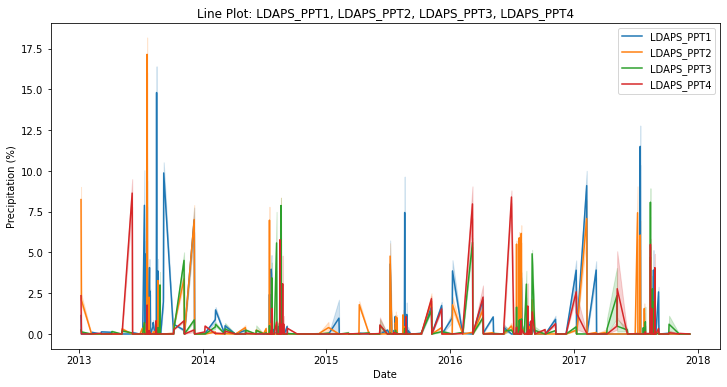

In [77]:
# Line plot for LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='LDAPS_PPT1', data=df, label='LDAPS_PPT1')
sns.lineplot(x='Date', y='LDAPS_PPT2', data=df, label='LDAPS_PPT2')
sns.lineplot(x='Date', y='LDAPS_PPT3', data=df, label='LDAPS_PPT3')
sns.lineplot(x='Date', y='LDAPS_PPT4', data=df, label='LDAPS_PPT4')

# Customize the plot
plt.title('Line Plot: LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4')
plt.xlabel('Date')
plt.ylabel('Precipitation (%)')
plt.legend()
plt.show()


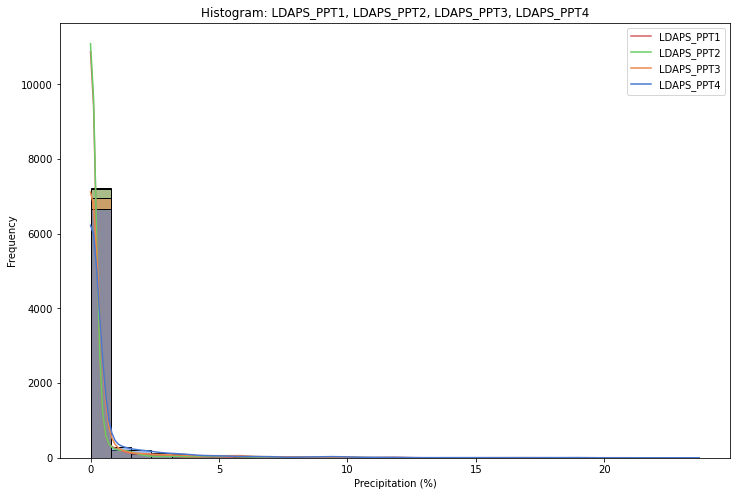

In [78]:
# Histogram for LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4
plt.figure(figsize=(12, 8))
sns.histplot(data=df[['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']], bins=30, kde=True, palette='muted')

# Customize the plot
plt.title('Histogram: LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4')
plt.xlabel('Precipitation (%)')
plt.ylabel('Frequency')
plt.legend(labels=['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'])
plt.show()

All LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 are right skewed 

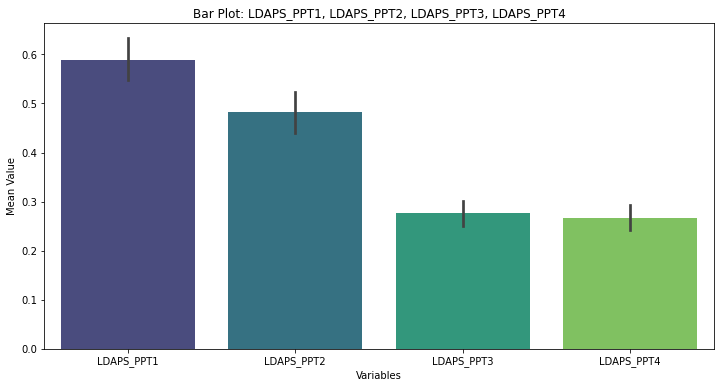

In [79]:
# Bar plot for LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4
plt.figure(figsize=(12, 6))
sns.barplot(data=df[['LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4']], palette='viridis')

# Customize the plot
plt.title('Bar Plot: LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4')
plt.xlabel('Variables')
plt.ylabel('Mean Value')  
plt.show()


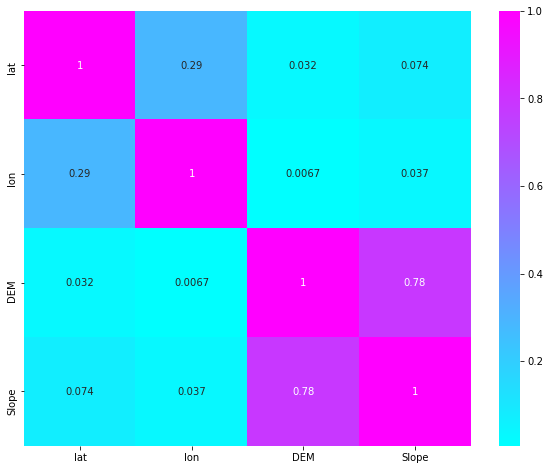

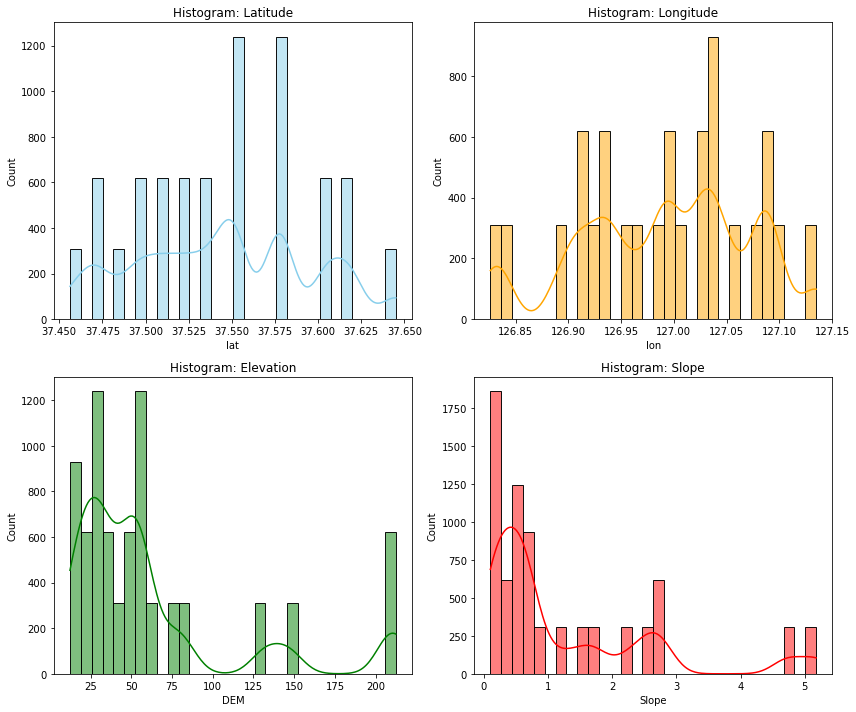

In [80]:
# 'lat', 'lon', 'DEM', 'Slope' are most commonly used to address weather condition
geo_data = df[['lat', 'lon', 'DEM', 'Slope']]


# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(geo_data.corr(), annot=True, cmap='cool')

# Histograms for each variable
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.histplot(geo_data['lat'], bins=30, kde=True, color='skyblue')
plt.title('Histogram: Latitude')

plt.subplot(2, 2, 2)
sns.histplot(geo_data['lon'], bins=30, kde=True, color='orange')
plt.title('Histogram: Longitude')

plt.subplot(2, 2, 3)
sns.histplot(geo_data['DEM'], bins=30, kde=True, color='green')
plt.title('Histogram: Elevation')

plt.subplot(2, 2, 4)
sns.histplot(geo_data['Slope'], bins=30, kde=True, color='red')
plt.title('Histogram: Slope')

plt.tight_layout()
plt.show()


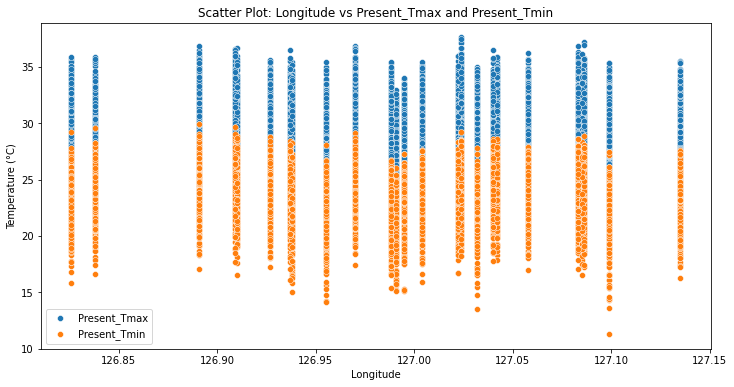

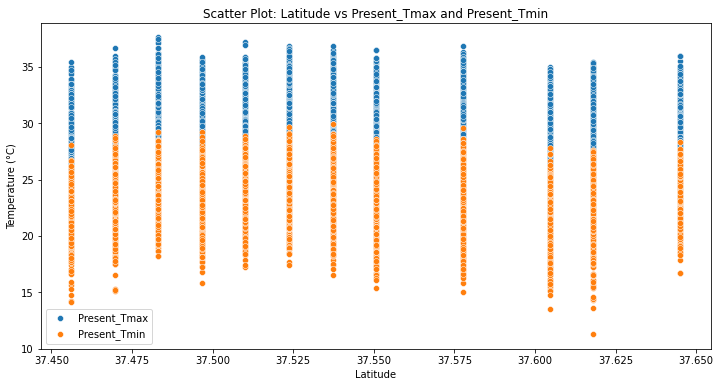

In [81]:
# Scatter plot for lat vs Present_Tmax and Present_Tmin
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lon', y='Present_Tmax', data=df, label='Present_Tmax')
sns.scatterplot(x='lon', y='Present_Tmin', data=df, label='Present_Tmin')

# Customize the plot
plt.title('Scatter Plot: Longitude vs Present_Tmax and Present_Tmin')
plt.xlabel('Longitude')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Scatter plot for lat vs Present_Tmax and Present_Tmin
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lat', y='Present_Tmax', data=df, label='Present_Tmax')
sns.scatterplot(x='lat', y='Present_Tmin', data=df, label='Present_Tmin')

# Customize the plot
plt.title('Scatter Plot: Latitude vs Present_Tmax and Present_Tmin')
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

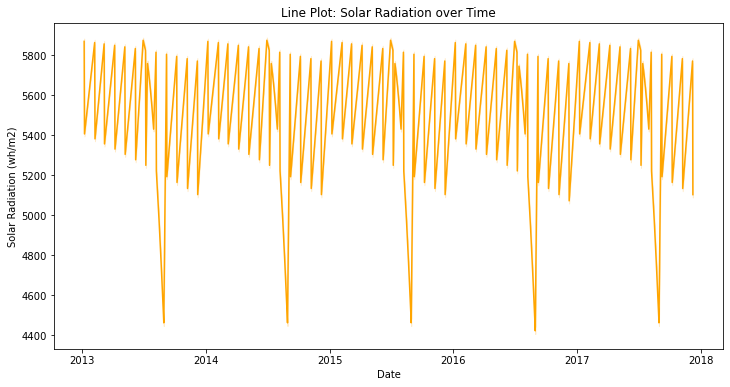

In [82]:
# Line plot for Solar radiation
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Solar radiation', data=df, color='orange')

# Customize the plot
plt.title('Line Plot: Solar Radiation over Time')
plt.xlabel('Date')
plt.ylabel('Solar Radiation (wh/m2)')
plt.show()

The plot is repesenting a repeated pattren every year which might indicating the seasonal changes 

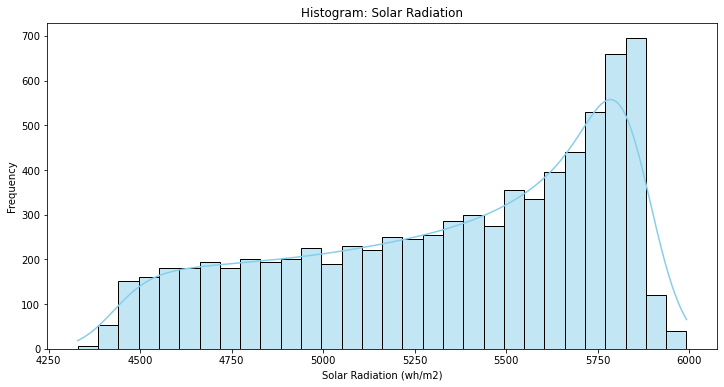

In [83]:
# Histogram for Solar radiation
plt.figure(figsize=(12, 6))
sns.histplot(df['Solar radiation'], bins=30, kde=True, color='skyblue')

# Customize the plot
plt.title('Histogram: Solar Radiation')
plt.xlabel('Solar Radiation (wh/m2)')
plt.ylabel('Frequency')
plt.show()

solar radiation is left skewed

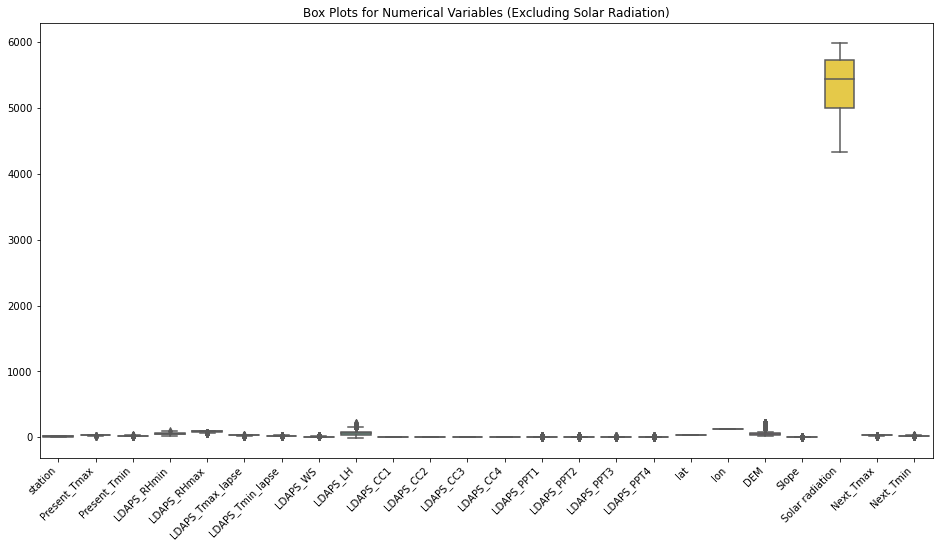

In [84]:
# Select numerical columns excluding 'Solar radiation'
numerical_columns = df.select_dtypes(include=['float64']).columns


# Create box plots for each numerical variable excluding 'Solar radiation'
plt.figure(figsize=(16, 8))
sns.boxplot(data=df[numerical_columns], palette='Set2')

# Customize the plot
plt.title('Box Plots for Numerical Variables (Excluding Solar Radiation)')
plt.xticks(rotation=45, ha='right')
plt.show()

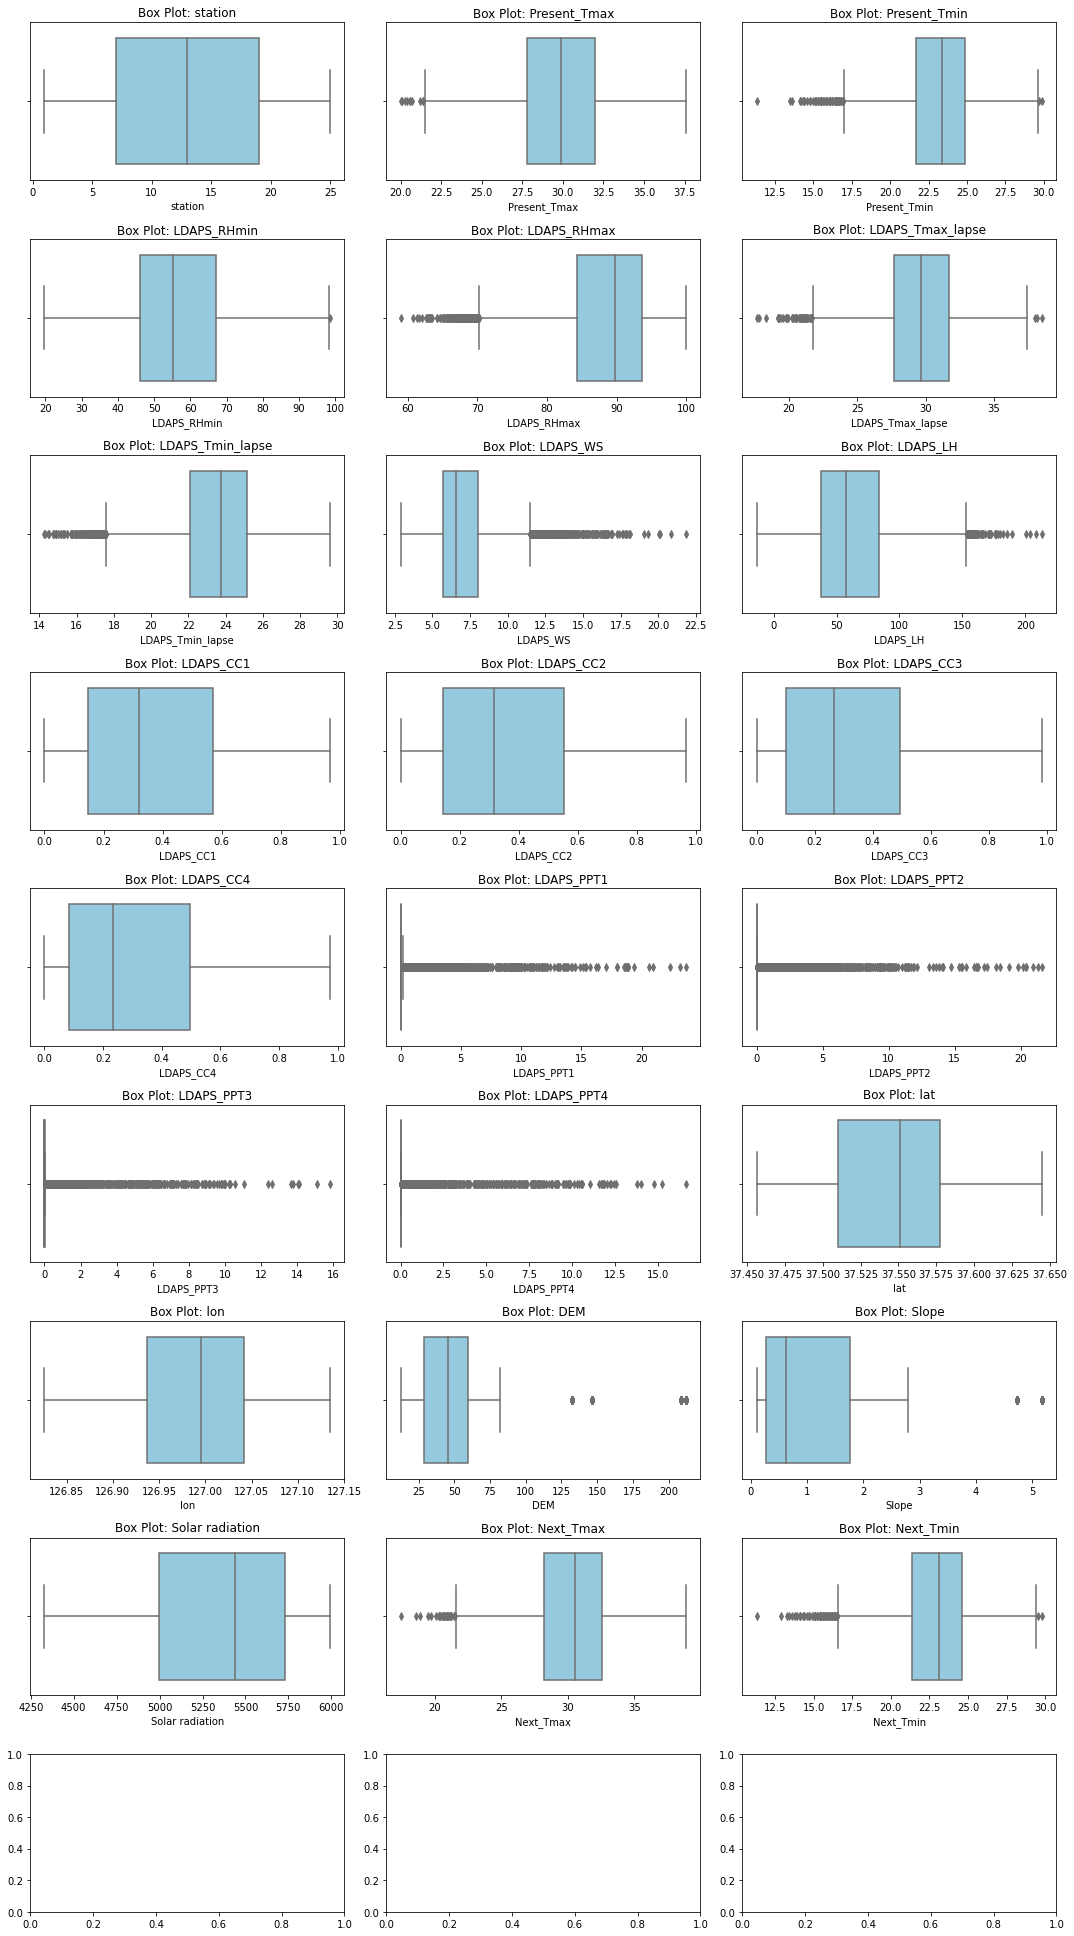

In [85]:
#for box plots
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=len(numerical_columns)//3 + 1, ncols=3, figsize=(15, 3 * (len(numerical_columns)//3 + 1)))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot individual box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot: {column}')
    axes[i].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

Most of the attributes are having outliers

In [86]:
df.shape

(7750, 25)

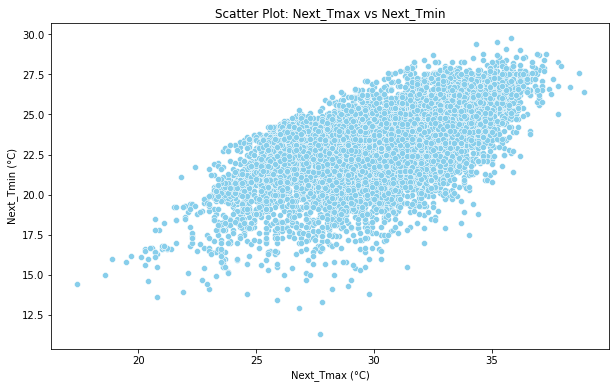


Correlation Matrix:
           Next_Tmax  Next_Tmin
Next_Tmax   1.000000   0.620119
Next_Tmin   0.620119   1.000000


In [87]:
# Scatter plot for Next_Tmax vs Next_Tmin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Next_Tmax', y='Next_Tmin', data=df, color='skyblue')
plt.title('Scatter Plot: Next_Tmax vs Next_Tmin')
plt.xlabel('Next_Tmax (°C)')
plt.ylabel('Next_Tmin (°C)')
plt.show()

# Correlation analysis
correlation_matrix = df[['Next_Tmax', 'Next_Tmin']].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

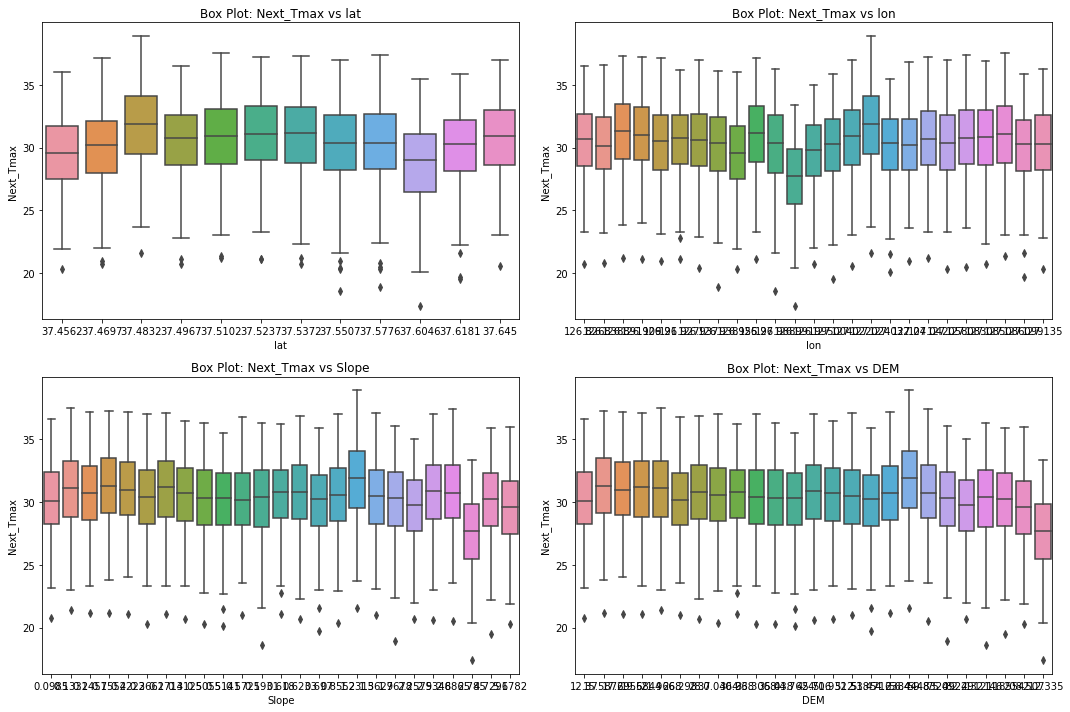

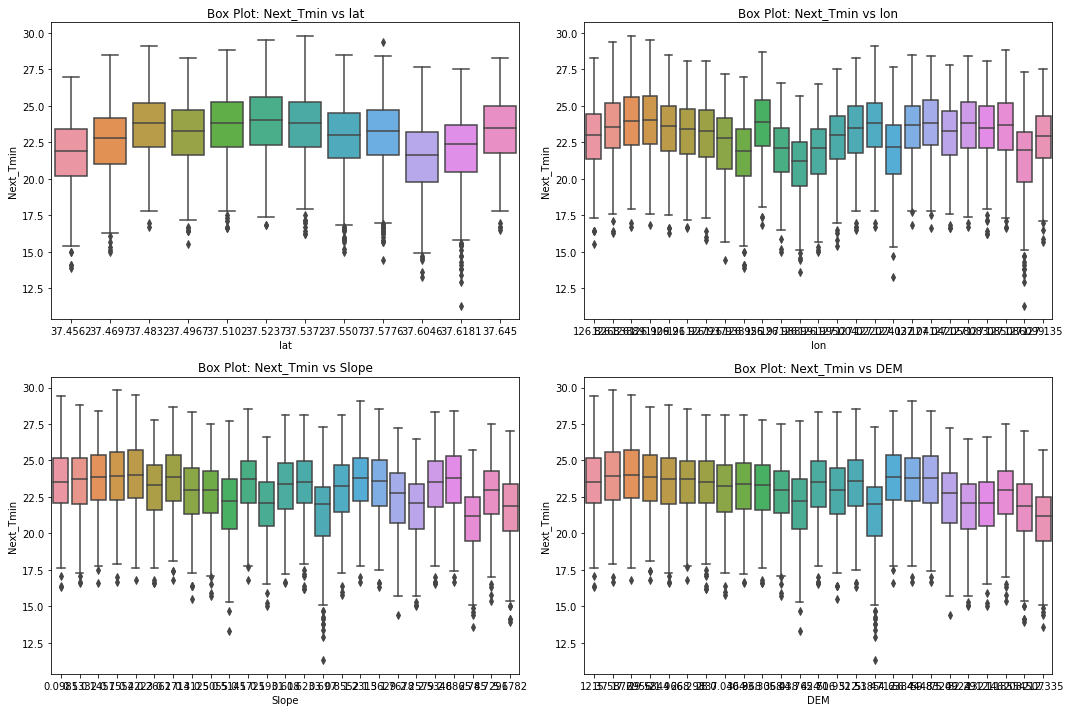

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Bivariate analysis using box plots
sns.boxplot(x='lat', y='Next_Tmax', data=df, ax=axes[0])
axes[0].set_title('Box Plot: Next_Tmax vs lat')

sns.boxplot(x='lon', y='Next_Tmax', data=df, ax=axes[1])
axes[1].set_title('Box Plot: Next_Tmax vs lon')

sns.boxplot(x='Slope', y='Next_Tmax', data=df, ax=axes[2])
axes[2].set_title('Box Plot: Next_Tmax vs Slope')

sns.boxplot(x='DEM', y='Next_Tmax', data=df, ax=axes[3])
axes[3].set_title('Box Plot: Next_Tmax vs DEM')

# Adjust layout
plt.tight_layout()
plt.show()

# Set up a grid of subplots for Next_Tmin
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Bivariate analysis using box plots for Next_Tmin
sns.boxplot(x='lat', y='Next_Tmin', data=df, ax=axes[0])
axes[0].set_title('Box Plot: Next_Tmin vs lat')

sns.boxplot(x='lon', y='Next_Tmin', data=df, ax=axes[1])
axes[1].set_title('Box Plot: Next_Tmin vs lon')

sns.boxplot(x='Slope', y='Next_Tmin', data=df, ax=axes[2])
axes[2].set_title('Box Plot: Next_Tmin vs Slope')

sns.boxplot(x='DEM', y='Next_Tmin', data=df, ax=axes[3])
axes[3].set_title('Box Plot: Next_Tmin vs DEM')

# Adjust layout
plt.tight_layout()
plt.show()


* In the analysis of 'Next_Tmax' with latitude ('lat') and longitude ('lon'), the box plots reveal variations in maximum temperatures based on the geographical coordinates.


* Similarly, the bivariate analysis involving 'Next_Tmax' with slope ('Slope') and elevation ('DEM') provides insights into the impact of terrain characteristics on maximum temperatures. 


* The box plots for 'Next_Tmin' exhibit similar trends, indicating how minimum temperatures are influenced by geographical and topographical factors.

From the above plots
In general longitutde is doesn't effect the temperature but from the above plot we can observe a change in temperatuers,
as the slopes increases the range of temperature also increases. Lowest and Highest temperatures are observed at consecutive slopes ,as the elevation increases, temperature decreases. 

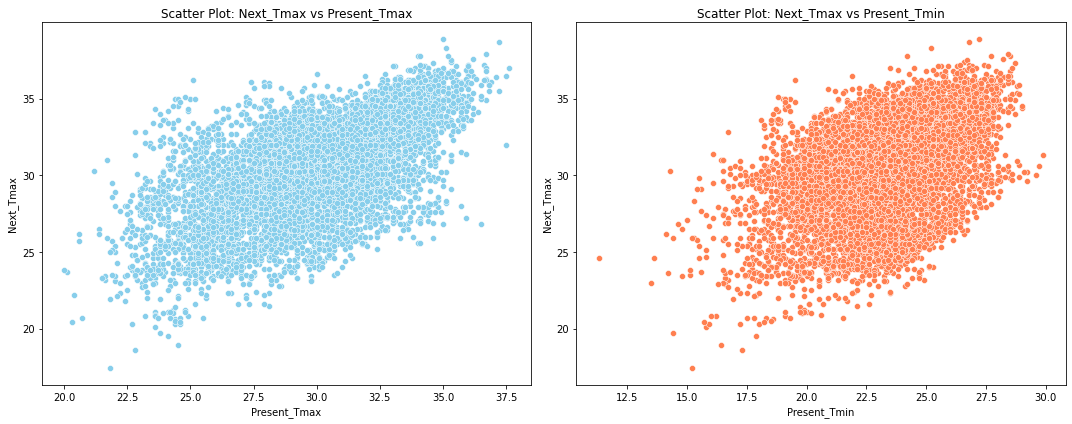

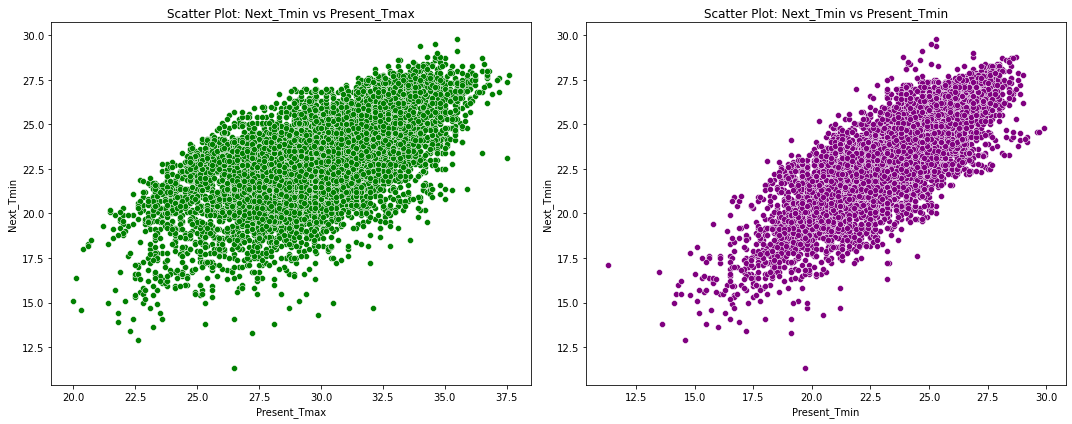

In [89]:
# Set up a grid of subplots for Next_Tmax vs Present_Tmax
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for Next_Tmax vs Present_Tmax with different colors
sns.scatterplot(x='Present_Tmax', y='Next_Tmax', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Scatter Plot: Next_Tmax vs Present_Tmax')
axes[0].set_xlabel('Present_Tmax')
axes[0].set_ylabel('Next_Tmax')

# Scatter plot for Next_Tmin vs Present_Tmin with different colors
sns.scatterplot(x='Present_Tmin', y='Next_Tmax', data=df, ax=axes[1], color='coral')
axes[1].set_title('Scatter Plot: Next_Tmax vs Present_Tmin')
axes[1].set_xlabel('Present_Tmin')
axes[1].set_ylabel('Next_Tmax')

# Adjust layout
plt.tight_layout()
plt.show()

# Set up a grid of subplots for Next_Tmin
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for Next_Tmax vs Present_Tmax with different colors
sns.scatterplot(x='Present_Tmax', y='Next_Tmin', data=df, ax=axes[0], color='green')
axes[0].set_title('Scatter Plot: Next_Tmin vs Present_Tmax')
axes[0].set_xlabel('Present_Tmax')
axes[0].set_ylabel('Next_Tmin')

# Scatter plot for Next_Tmin vs Present_Tmin with different colors
sns.scatterplot(x='Present_Tmin', y='Next_Tmin', data=df, ax=axes[1], color='purple')
axes[1].set_title('Scatter Plot: Next_Tmin vs Present_Tmin')
axes[1].set_xlabel('Present_Tmin')
axes[1].set_ylabel('Next_Tmin')

# Adjust layout
plt.tight_layout()
plt.show()


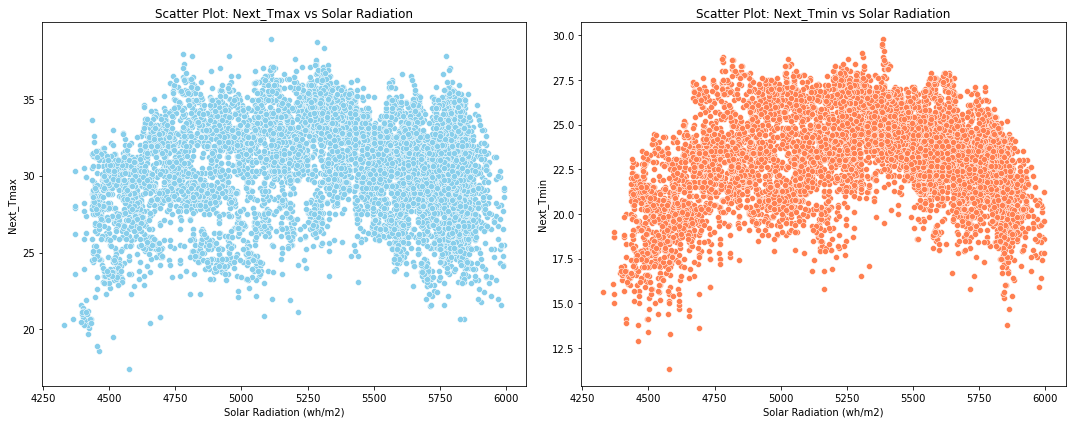

In [90]:
# Set up a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for Next_Tmax vs Solar radiation
sns.scatterplot(x='Solar radiation', y='Next_Tmax', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Scatter Plot: Next_Tmax vs Solar Radiation')
axes[0].set_xlabel('Solar Radiation (wh/m2)')
axes[0].set_ylabel('Next_Tmax')

# Scatter plot for Next_Tmin vs Solar radiation
sns.scatterplot(x='Solar radiation', y='Next_Tmin', data=df, ax=axes[1], color='coral')
axes[1].set_title('Scatter Plot: Next_Tmin vs Solar Radiation')
axes[1].set_xlabel('Solar Radiation (wh/m2)')
axes[1].set_ylabel('Next_Tmin')

# Adjust layout
plt.tight_layout()
plt.show()

In [91]:
print(df['station'].unique())


[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


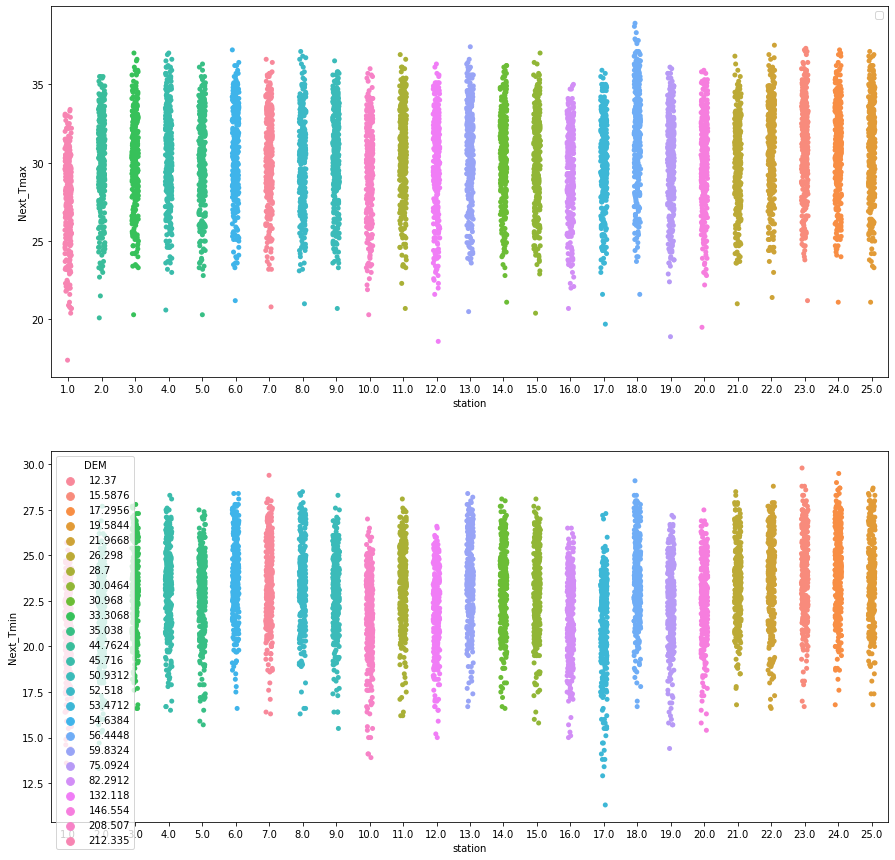

In [92]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)
sns.stripplot(x='station', y='Next_Tmax', hue='DEM', data=df)
plt.legend('')

plt.subplot(2, 1, 2)
sns.stripplot(x='station', y='Next_Tmin', hue='DEM', data=df)
plt.show()


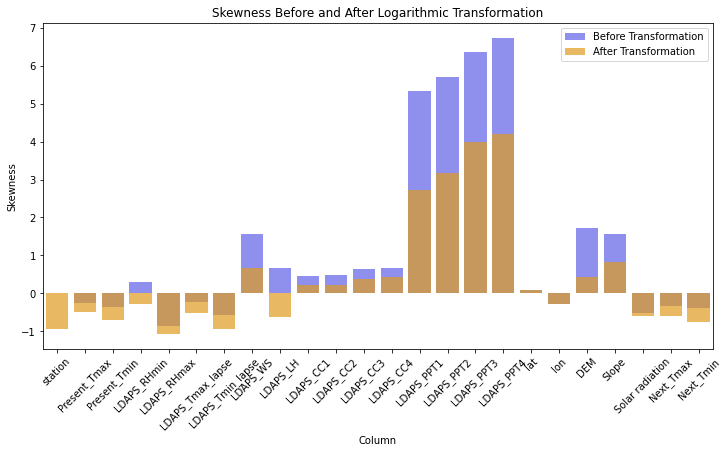

In [93]:

# Calculate skewness before transformation
skew_before = df.skew()

# Apply logarithmic transformation to the skewed columns
skewed_columns = df.select_dtypes(include=['float64']).columns
df[skewed_columns] = np.log1p(df[skewed_columns])

# Calculate skewness after transformation
skew_after = df.skew()

# Visualize the skewness before and after
plt.figure(figsize=(12, 6))
sns.barplot(x=skew_before.index, y=skew_before.values, color='blue', alpha=0.5, label='Before Transformation')
sns.barplot(x=skew_after.index, y=skew_after.values, color='orange', alpha=0.7, label='After Transformation')
plt.title('Skewness Before and After Logarithmic Transformation')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## Scaling the data

In [94]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled (excluding non-numeric and target columns)
columns_to_scale = df.select_dtypes(include=['float64']).columns.difference(['Next_Tmax', 'Next_Tmin'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the scaled dataframe
df.head()


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0.000000,2013-06-30,0.569423,0.650770,0.668812,0.823568,0.591532,0.650230,0.394883,0.708591,...,0.0,0.0,0.0,0.786428,0.534281,1.000000,0.716295,1.000000,3.404525,3.100092
1,0.158079,2013-06-30,0.737520,0.660420,0.600720,0.812894,0.670313,0.710515,0.307086,0.633756,...,0.0,0.0,0.0,0.786428,0.666935,0.444230,0.185791,0.935907,3.449988,3.157000
2,0.270238,2013-06-30,0.722471,0.739154,0.556372,0.668899,0.680632,0.740668,0.343507,0.398723,...,0.0,0.0,0.0,0.643570,0.751035,0.340210,0.082217,0.932888,3.468856,3.214868
3,0.357235,2013-06-30,0.742505,0.743613,0.668640,0.932092,0.664009,0.669222,0.303548,0.694370,...,0.0,0.0,0.0,1.000000,0.634584,0.451675,0.676697,0.929429,3.487375,3.230804
4,0.428317,2013-06-30,0.712362,0.674736,0.645972,0.803466,0.638207,0.678665,0.310708,0.822775,...,0.0,0.0,0.0,0.501142,1.000000,0.357983,0.182493,0.930788,3.471966,3.157000


## Modeling 

In [95]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [96]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0.000000,2013-06-30,0.569423,0.650770,0.668812,0.823568,0.591532,0.650230,0.394883,0.708591,...,0.0,0.0,0.0,0.786428,0.534281,1.000000,0.716295,1.000000,3.404525,3.100092
1,0.158079,2013-06-30,0.737520,0.660420,0.600720,0.812894,0.670313,0.710515,0.307086,0.633756,...,0.0,0.0,0.0,0.786428,0.666935,0.444230,0.185791,0.935907,3.449988,3.157000
2,0.270238,2013-06-30,0.722471,0.739154,0.556372,0.668899,0.680632,0.740668,0.343507,0.398723,...,0.0,0.0,0.0,0.643570,0.751035,0.340210,0.082217,0.932888,3.468856,3.214868
3,0.357235,2013-06-30,0.742505,0.743613,0.668640,0.932092,0.664009,0.669222,0.303548,0.694370,...,0.0,0.0,0.0,1.000000,0.634584,0.451675,0.676697,0.929429,3.487375,3.230804
4,0.428317,2013-06-30,0.712362,0.674736,0.645972,0.803466,0.638207,0.678665,0.310708,0.822775,...,0.0,0.0,0.0,0.501142,1.000000,0.357983,0.182493,0.930788,3.471966,3.157000


In [97]:
X = df.drop(['Date', 'Next_Tmax', 'Next_Tmin'], axis=1)
y_max = df['Next_Tmax']
y_min = df['Next_Tmin']


In [98]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,0.000000,0.569423,0.650770,0.668812,0.823568,0.591532,0.650230,0.394883,0.708591,0.310675,...,0.180827,0.0,0.0,0.0,0.0,0.786428,0.534281,1.000000,0.716295,1.000000
1,0.158079,0.737520,0.660420,0.600720,0.812894,0.670313,0.710515,0.307086,0.633756,0.300533,...,0.176662,0.0,0.0,0.0,0.0,0.786428,0.666935,0.444230,0.185791,0.935907
2,0.270238,0.722471,0.739154,0.556372,0.668899,0.680632,0.740668,0.343507,0.398723,0.280910,...,0.195307,0.0,0.0,0.0,0.0,0.643570,0.751035,0.340210,0.082217,0.932888
3,0.357235,0.742505,0.743613,0.668640,0.932092,0.664009,0.669222,0.303548,0.694370,0.289474,...,0.185136,0.0,0.0,0.0,0.0,1.000000,0.634584,0.451675,0.676697,0.929429
4,0.428317,0.712362,0.674736,0.645972,0.803466,0.638207,0.678665,0.310708,0.822775,0.208357,...,0.230771,0.0,0.0,0.0,0.0,0.501142,1.000000,0.357983,0.182493,0.930788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,0.934870,0.226191,0.460570,0.134997,0.535545,0.579536,0.336700,0.379108,0.213018,0.076185,...,0.006423,0.0,0.0,0.0,0.0,0.501142,0.692814,0.257703,0.207556,0.088581
7746,0.952201,0.184775,0.437223,0.256974,0.662494,0.527460,0.299812,0.313472,0.751970,0.095095,...,0.025754,0.0,0.0,0.0,0.0,0.286517,0.841585,0.195331,0.018007,0.078750
7747,0.968794,0.239768,0.419378,0.184087,0.550200,0.510436,0.371479,0.344352,0.718103,0.043733,...,0.000000,0.0,0.0,0.0,0.0,0.429625,0.210557,0.077853,0.029241,0.079795
7748,0.984709,0.239768,0.454781,0.118670,0.512037,0.542016,0.368411,0.374606,0.609434,0.052088,...,0.000000,0.0,0.0,0.0,0.0,0.358084,0.268846,0.113236,0.061832,0.076374


In [99]:
y_max

0       3.404525
1       3.449988
2       3.468856
3       3.487375
4       3.471966
          ...   
7745    3.353407
7746    3.367296
7747    3.377588
7748    3.387774
7749    3.360375
Name: Next_Tmax, Length: 7750, dtype: float64

In [100]:
y_min

0       3.100092
1       3.157000
2       3.214868
3       3.230804
4       3.157000
          ...   
7745    2.928524
7746    2.895912
7747    2.949688
7748    2.985682
7749    2.912351
Name: Next_Tmin, Length: 7750, dtype: float64

In [101]:
X

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,0.000000,0.569423,0.650770,0.668812,0.823568,0.591532,0.650230,0.394883,0.708591,0.310675,...,0.180827,0.0,0.0,0.0,0.0,0.786428,0.534281,1.000000,0.716295,1.000000
1,0.158079,0.737520,0.660420,0.600720,0.812894,0.670313,0.710515,0.307086,0.633756,0.300533,...,0.176662,0.0,0.0,0.0,0.0,0.786428,0.666935,0.444230,0.185791,0.935907
2,0.270238,0.722471,0.739154,0.556372,0.668899,0.680632,0.740668,0.343507,0.398723,0.280910,...,0.195307,0.0,0.0,0.0,0.0,0.643570,0.751035,0.340210,0.082217,0.932888
3,0.357235,0.742505,0.743613,0.668640,0.932092,0.664009,0.669222,0.303548,0.694370,0.289474,...,0.185136,0.0,0.0,0.0,0.0,1.000000,0.634584,0.451675,0.676697,0.929429
4,0.428317,0.712362,0.674736,0.645972,0.803466,0.638207,0.678665,0.310708,0.822775,0.208357,...,0.230771,0.0,0.0,0.0,0.0,0.501142,1.000000,0.357983,0.182493,0.930788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,0.934870,0.226191,0.460570,0.134997,0.535545,0.579536,0.336700,0.379108,0.213018,0.076185,...,0.006423,0.0,0.0,0.0,0.0,0.501142,0.692814,0.257703,0.207556,0.088581
7746,0.952201,0.184775,0.437223,0.256974,0.662494,0.527460,0.299812,0.313472,0.751970,0.095095,...,0.025754,0.0,0.0,0.0,0.0,0.286517,0.841585,0.195331,0.018007,0.078750
7747,0.968794,0.239768,0.419378,0.184087,0.550200,0.510436,0.371479,0.344352,0.718103,0.043733,...,0.000000,0.0,0.0,0.0,0.0,0.429625,0.210557,0.077853,0.029241,0.079795
7748,0.984709,0.239768,0.454781,0.118670,0.512037,0.542016,0.368411,0.374606,0.609434,0.052088,...,0.000000,0.0,0.0,0.0,0.0,0.358084,0.268846,0.113236,0.061832,0.076374


In [116]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and you have X, y_max, and y_min

# Handle missing values in X
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

def randomstate(a, b):
    maxx = 10000000000000
    for state in range(1, 201):
        xtrain, xtest, ytrain, ytest = train_test_split(a, b, test_size=0.25, random_state=state)
        model = LinearRegression()
        model.fit(xtrain, ytrain)
        p = model.predict(xtest)
        mse = mean_squared_error(p, ytest)
        if maxx > mse:
            maxx = mse
            s = state
    return s



In [118]:
def createmodels(model_list, x, y, n):
    name = []
    meanabs = []
    meansqd = []
    rootmeansqd = []
    r2 = []
    mcv = []

    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=randomstate(x, y))

    # Creating models
    for i, model in enumerate(model_list):
        model.fit(xtrain, ytrain)
        p = model.predict(xtest)
        score = cross_val_score(model, x, y, cv=5)

        # Calculating scores of the model and appending them to a list
        name.append(n[i])
        meanabs.append(np.round(mean_absolute_error(p, ytest), 4))
        meansqd.append(np.round(mean_squared_error(p, ytest), 4))
        rootmeansqd.append(np.round(np.sqrt(mean_squared_error(p, ytest)), 4))
        r2.append(np.round(r2_score(p, ytest), 2) * 100)
        mcv.append(np.round(np.mean(score), 2) * 100)

    # Creating Dataframe
    data = pd.DataFrame()
    data['Model'] = name
    data['Mean Absolute Error'] = meanabs
    data['Mean Squared Error'] = meansqd
    data['Root Mean Squared Error'] = rootmeansqd
    data['R2 Score'] = r2
    data['Mean of Cross Validation Score'] = mcv
    data.set_index('Model', inplace=True)
    return data


In [121]:
# For y_min
result_min = createmodels(models, X_imputed, y_min, names)
print("Results for y_min:")
result_min

# For y_max
result_max = createmodels(models, X_imputed, y_max, names)
print("\nResults for y_max:")
result_max


Results for y_min:

Results for y_max:


,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
SVR,0.0400,0.0024,0.0491,6.400000e+01,61.0
LinearRegression,0.0360,0.0022,0.0474,7.300000e+01,70.0
Lasso,0.0828,0.0104,0.1019,-5.850528e+29,-3.0
Ridge,0.0360,0.0022,0.0474,7.200000e+01,70.0
DecisionTreeRegressor,0.0349,0.0024,0.0491,7.700000e+01,46.0
RandomForestRegressor,0.0233,0.0010,0.0312,8.900000e+01,68.0
AdaBoostRegressor,0.0415,0.0026,0.0507,5.600000e+01,65.0
GradientBoostingRegressor,0.0294,0.0015,0.0385,8.200000e+01,69.0
XGBRegressor,0.0219,0.0009,0.0292,9.100000e+01,66.0


>In y_max case, the XGB Regressor has the lowest MSE and RMSE values, making it a  best suitable model. 

In [122]:
result_min

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,R2 Score,Mean of Cross Validation Score
Model,,,,,
SVR,0.0375,0.0021,0.0459,7.600000e+01,72.0
LinearRegression,0.0322,0.0017,0.0415,8.100000e+01,78.0
Lasso,0.0813,0.0105,0.1027,-5.346411e+30,-16.0
Ridge,0.0323,0.0017,0.0415,8.000000e+01,78.0
DecisionTreeRegressor,0.0346,0.0023,0.0476,7.900000e+01,56.0
RandomForestRegressor,0.0238,0.0010,0.0314,9.000000e+01,77.0
AdaBoostRegressor,0.0375,0.0022,0.0468,7.200000e+01,72.0
GradientBoostingRegressor,0.0264,0.0011,0.0338,8.800000e+01,79.0
XGBRegressor,0.0208,0.0008,0.0275,9.200000e+01,76.0


>Even in y_min case, the XGB Regressor appears to be the best-performing model. It has the lowest Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error, along with the highest R2 Score and a relatively high mean of the cross-validation score.

## Hyper parameter Tuning

In [127]:
# Define the XGBRegressor
xgb_reg  = XGBRegressor()

In [125]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}


In [128]:
# For y_max
grid_search_max = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_max.fit(X_imputed, y_max)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [129]:
# For y_min
grid_search_min = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search_min.fit(X_imputed, y_min)



GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [130]:
# Display the best hyperparameters for both y_max and y_min
print("Best Hyperparameters for y_max:", grid_search_max.best_params_)
print("Best Hyperparameters for y_min:", grid_search_min.best_params_)

Best Hyperparameters for y_max: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
Best Hyperparameters for y_min: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.9}


In [132]:
# Best hyperparameters for y_max
best_params_max = {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}

# Best hyperparameters for y_min
best_params_min = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.9}

# Train XGBoost models for y_max and y_min with best hyperparameters
xgb_reg_max = XGBRegressor(**best_params_max)
xgb_reg_min = XGBRegressor(**best_params_min)



In [133]:
# Split the data into training and testing sets
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_imputed, y_max, test_size=0.25, random_state=42)
X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_imputed, y_min, test_size=0.25, random_state=42)

# Fit the models
xgb_reg_max.fit(X_train_max, y_train_max)
xgb_reg_min.fit(X_train_min, y_train_min)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [134]:
# Predictions
predictions_max = xgb_reg_max.predict(X_test_max)
predictions_min = xgb_reg_min.predict(X_test_min)



In [143]:
print('Evaluation Metrics for Next Day Maximum Temperature')
print('Mean Absolute Error is', np.round(mean_absolute_error(predictions_max, y_test_max), 4))
print('Mean Squared Error is', np.round(mean_squared_error(predictions_max, y_test_max), 4))
print('Root Mean Squared Error is', np.round(np.sqrt(mean_squared_error(predictions_max, y_test_max)), 4))
print('R2 Score is', np.round(r2_score(predictions_max, y_test_max) * 100, 4))


Evaluation Metrics for Next Day Maximum Temperature
Mean Absolute Error is 0.0308
Mean Squared Error is 0.0016
Root Mean Squared Error is 0.0403
R2 Score is 79.6252


In [160]:
mae_min = mean_absolute_error(predictions_min, y_test_min)
mse_min = mean_squared_error(predictions_min, y_test_min)
rmse_min = np.sqrt(mse_min)
r2_min = r2_score(predictions_min, y_test_min)


# Display results for y_min
print("\nEvaluation Metrics for Next Day Minimum Temperature")
print("Mean Absolute Error is", np.round(mae_min, 4))
print("Mean Squared Error is", np.round(mse_min, 4))
print("Root Mean Squared Error is", np.round(rmse_min, 4))
print("R2 Score is", np.round(r2_min, 4) * 100)


Evaluation Metrics for Next Day Minimum Temperature
Mean Absolute Error is 0.0283
Mean Squared Error is 0.0013
Root Mean Squared Error is 0.0366
R2 Score is 85.35000000000001


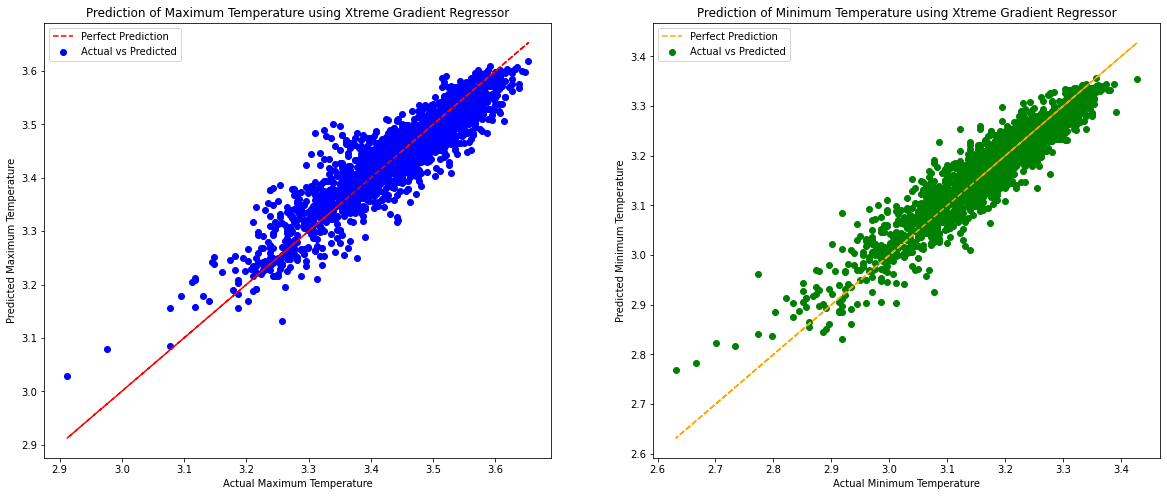

In [164]:
plt.figure(figsize=(20, 8))

# Plot for Maximum Temperature
plt.subplot(1, 2, 1)
plt.scatter(x=y_test_max, y=predictions_max, color='blue', marker='o', label='Actual vs Predicted')
plt.plot(y_test_max, y_test_max, color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Maximum Temperature')
plt.ylabel('Predicted Maximum Temperature')
plt.title('Prediction of Maximum Temperature using Xtreme Gradient Regressor')
plt.legend()

# Plot for Minimum Temperature
plt.subplot(1, 2, 2)
plt.scatter(x=y_test_min, y=predictions_min, color='green', marker='o', label='Actual vs Predicted')
plt.plot(y_test_min, y_test_min, color='orange', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Minimum Temperature')
plt.ylabel('Predicted Minimum Temperature')
plt.title('Prediction of Minimum Temperature using Xtreme Gradient Regressor')
plt.legend()

plt.show()



In [165]:
import pickle

# Export the XGBoost models
with open('xgb_model_max.pkl', 'wb') as file:
    pickle.dump(xgb_reg_max, file)

with open('xgb_model_min.pkl', 'wb') as file:
    pickle.dump(xgb_reg_min, file)
